In [1]:
# Imports

# Basics
import numpy as np
import pandas as pd

#Graphics
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import plotly.express as px
import folium
from folium import plugins
from folium.plugins import HeatMap

# Datetime
from datetime import datetime

%matplotlib inline

### Descrição do projeto - Project description

Português:
O objetivo deste miniprojeto é realizar a analise exploratória, analisando e entendendo, o **dataset público do Airbnb da cidade de New York** de 2019, extraindo o máximo insights de negócios possíveis. 
Algumas das questões a serem respondidas são:
- O que podemos entender sobre diferentes hosts e áreas?
- O que podemos entender sobre as melhores localizações, preço médio, duração do aluguel, avaliações, etc.
- Quais hospedagens são as mais ocupadas e por quê?
- Existe alguma diferença perceptível de tráfego entre as diferentes áreas e qual poderia ser a possivel razão para isso?


English:
In this Data exploration project, it is intended to analyze and understand the **New York City AirBnb Open Data** from 2019 to extract the maximum of business insights from it.
Some of the questions we are seeking answer for are:
- What can we learn about different hosts and areas?
- What can we learn about best locations, price average, rent length, reviews, etc
- Which hosts are the busiest and why?
- Is there any noticeable difference of traffic among different areas and what could be the reason for it?

### Carregando e visualizando o dataset - Loading and viewing the dataset

In [2]:
# Open Dataset
path = 'AB_NYC_2019.csv'
df = pd.read_csv(path)

In [3]:
# First view to understand how the data is organized
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

Português:
Gosto de começar a exploração dos dados com uma descrição estatística do dataset, pois assim posso extrair os primeiros insights para continuar a análise. Neste ponto, vou excluir as colunas *'id', 'host_id', 'latitude', 'longitude' e 'last_review'* apenas porque elas não me trarão muitas informações neste caso.

English:
I like to start the data exploration with a good statistical description of the dataset, so that way I can already extract the first insights to keep exploring. Here, I will exclude the columns *'id', 'host_id', 'latitude', 'longitude' and 'last_review'* just because those won't bring me much information in this case.

In [4]:
df.drop(['id','host_id','latitude','longitude','last_review'],axis=1).describe(include='all')

name host_name neighbourhood_group neighbourhood  \
count            48879     48874               48895         48895   
unique           47905     11452                   5           221   
top     Hillside Hotel   Michael           Manhattan  Williamsburg   
freq                18       417               21661          3920   
mean               NaN       NaN                 NaN           NaN   
std                NaN       NaN                 NaN           NaN   
min                NaN       NaN                 NaN           NaN   
25%                NaN       NaN                 NaN           NaN   
50%                NaN       NaN                 NaN           NaN   
75%                NaN       NaN                 NaN           NaN   
max                NaN       NaN                 NaN           NaN   

              room_type         price  minimum_nights  number_of_reviews  \
count             48895  48895.000000    48895.000000       48895.000000   
unique                3           NaN             NaN                NaN   
top     Entire home/apt           NaN             NaN                NaN   
freq              25409           NaN             NaN                NaN   
mean                NaN    152.720687        7.029962          23.274466   
std                 NaN    240.154170       20.510550          44.550582   
min                 NaN      0.000000        1.000000           0.000000   
25%                 NaN     69.000000        1.000000           1.000000   
50%                 NaN    106.000000        3.000000           5.000000   
75%                 NaN    175.000000        5.000000          24.000000   
max                 NaN  10000.000000     1250.000000         629.000000   

        reviews_per_month  calculated_host_listings_count  availability_365  
count        38843.000000                    48895.000000      48895.000000  
unique                NaN                             NaN               NaN  
top                   NaN                             NaN               NaN  
freq                  NaN                             NaN               NaN  
mean             1.373221                        7.143982        112.781327  
std              1.680442                       32.952519        131.622289  
min              0.010000                        1.000000          0.000000  
25%              0.190000                        1.000000          0.000000  
50%              0.720000                        1.000000         45.000000  
75%              2.020000                        2.000000        227.000000  
max             58.500000                      327.000000        365.000000

Português: 
Os insights iniciais são:
- 'Michael é o nome de Host mais comum, com 417 aparições;
- A maioria das propriedades estão na ilha de Manhattan (21,6k de 48,8k = 44%);
- Mais de 50% dos aluguéis são para 'Entire home/apt', não apenas um quarto;
- Em média, a taxa é de \$ 152 dólares. Não parece variar muito, já que 75% das observações estão abaixo de \\$ 175 dólares;
- A média noturna mínima é de 7 noites. Aparentemente as pessoas gostam de ficar toda a semana em Nova York;


English:
The initial insights, therefore, are:
- Host Name 'Michael is the top one, with 417 appearences;
- Most of the properties are in the Manhattan island (21.6k out of 48.8k = 44%);
- More than 50% of the rentals are for 'Entire home or apt', not just a room;
- On average, the rate is \$ 152 dollars and that does not seem to vary too much, since 75% of the obervations are under \\$ 175 dollars;
- Minumum night average is 7 nights. People apparently like to stay for a whole week in NYC;

#### Histogramas - Histograms

Portugues:
Rápida visualização dos histogramas de todas as variáveis, para verificar se temos algum insight.

English:
Let's also take a quick look at the histograms for all of the variables and see if we come up with any good insights.

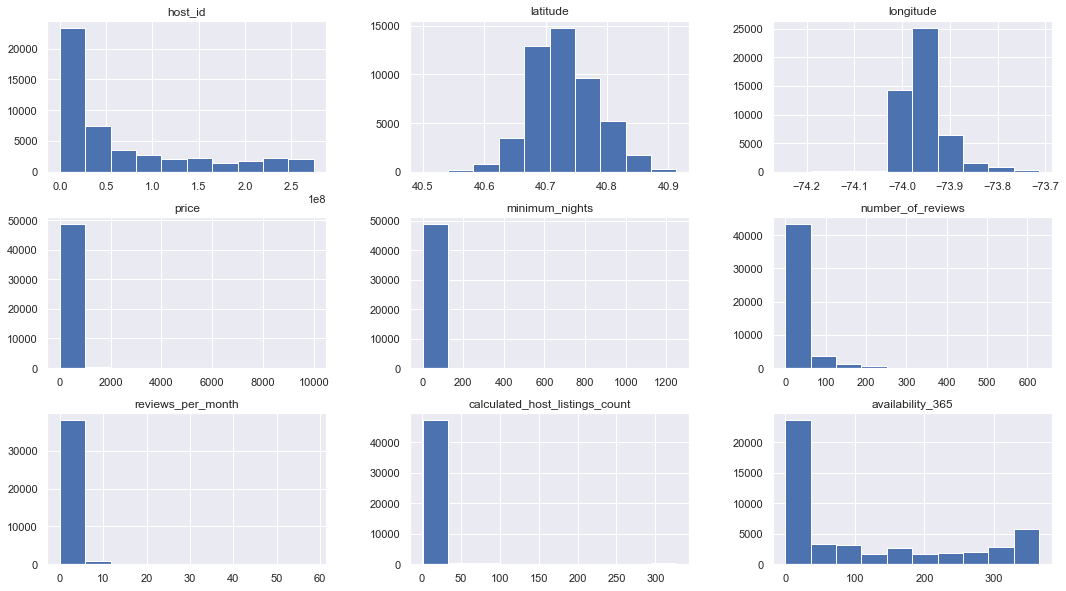

In [5]:
df.drop(['id'],axis=1).hist(figsize=(18,10))
plt.show()

Português:
- Da latitude e longitude, é razoável dizer que parecem concentrados. Veremos mais sobre isso em breve neste projeto.
- Muitas das variáveis são assimétricas positivas, tendo seus valores concentrados no lado esquerdo dos gráficos.


English:
- From latitude and longitude, it is reasonable to say that they look concentraded. We will see more further in this project.
- Many of the variables are positively skewed, having its values concentrated in the lower values of the graphics.

---

### 1. Quanto tempo, quanto e onde - How long, How much and Where

#### 1.1 Quantas noites as pessoas costumam ficar em Nova York? - How many nights people like to stay in NYC?

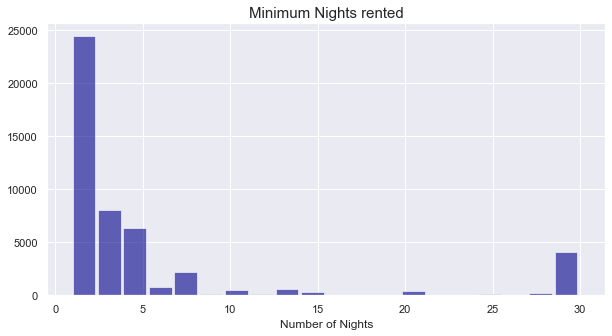

In [6]:
# Countplot minimum_nights
df.minimum_nights[df.minimum_nights<=30].hist(bins = 20, alpha=0.6, width=1.3, figsize=(10,5), color='darkblue')
plt.title('Minimum Nights rented', size=15)
plt.xlabel('Number of Nights')
plt.show()

Português:
O aluguel médio é de 7 dias. No entanto, os alugueres entre 2 a 5 dias são mais frequentes.
Aqui é interessante notar que os aluguéis de 30 dias também ocorrem com frequência. Mais que entre 6 e 29 dias.

English:
The average rental is 7 days. However, the most frequent rentals are between 2 to 5 days.
Interesting to notice here is that 30 days rentals occurs frequently too. Frequency bigger than between 6 to 29 days.

#### 1.2 Quanto as pessoas estão pagando? - How much are people are paying?

D:\ArquivosEProgramas\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ArquivosEProgramas\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


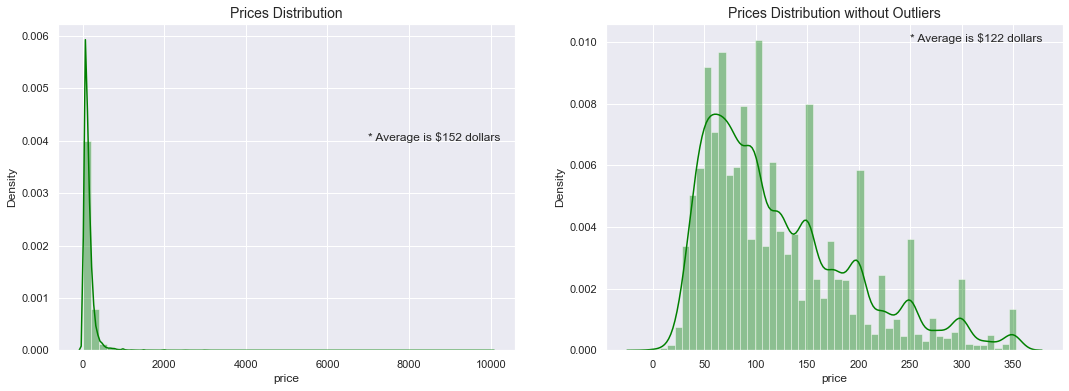

In [7]:
# Price average
fig, axs = plt.subplots(ncols=2, figsize=(18,6))

#Plot without filtering
sns.distplot(df['price'], color = 'green', ax=axs[0])
axs[0].set_title('Prices Distribution', size=14)
axs[0].text(7000,0.004,'* Average is $152 dollars', size=12)

# Plot with Filter
q = df.price.quantile(.95) #just the values within 95% confidence
sns.distplot(df.price[df.price<q], color = 'green', ax=axs[1])
axs[1].set_title('Prices Distribution without Outliers', size=14)
axs[1].text(250,0.01,'* Average is $122 dollars', size=12)

fig.savefig('images/precodistribuicao.png',dpi=600, 
               bbox_inches='tight', 
               transparent=False,
               pad_inches=0) #Salvando o plot

plt.show()

Português:
As pessoas pagam, em média, \$120 dólares por dia em seu Airbnb. No primeiro gráfico, sem remover os outliers, a média é 152 dólares, mas neste valor estaríamos contando alguns casos isolados em que alguém pagou 10.000 dólares por noite.

English:
People are staying in NYC and paying, on average \$120 dollars per day on their Airbnb. On the first graphic, without removing the outliers, the average is 152 USD, but then we would be counting a couple of cases where a person paid 10k USD.

D:\ArquivosEProgramas\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


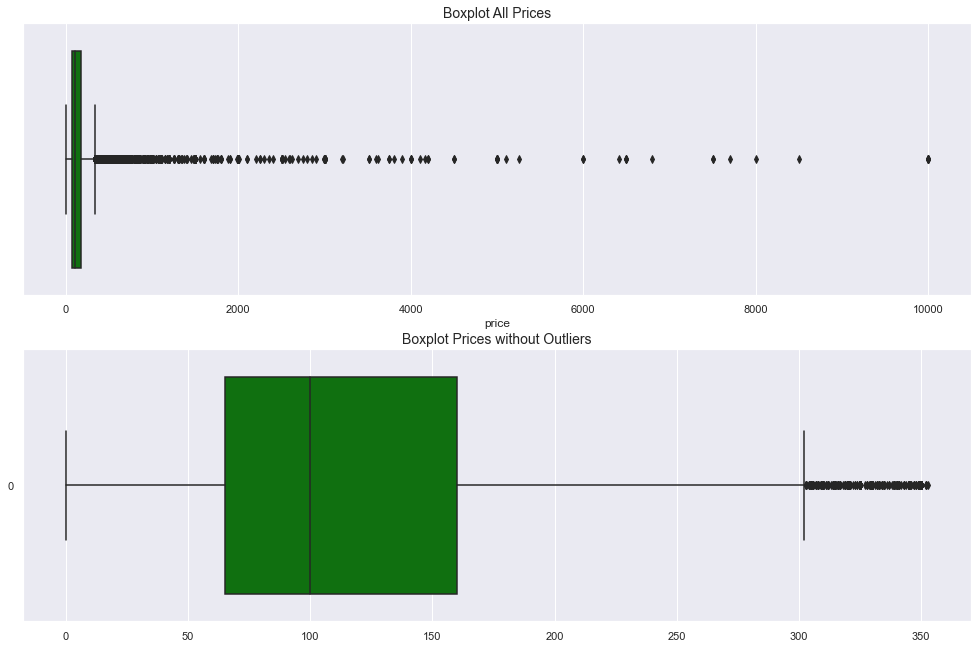

In [8]:
# Boxplots Price
fig, axs = plt.subplots(nrows=2, figsize=(17,11))
sns.boxplot('price', data=df, orient='h', color = 'green', ax=axs[0])
axs[0].set_title('Boxplot All Prices', size=14)
sns.boxplot(data=df.price[df.price<q], orient='h', color='green', ax=axs[1])
axs[1].set_title('Boxplot Prices without Outliers', size=14)
plt.show()

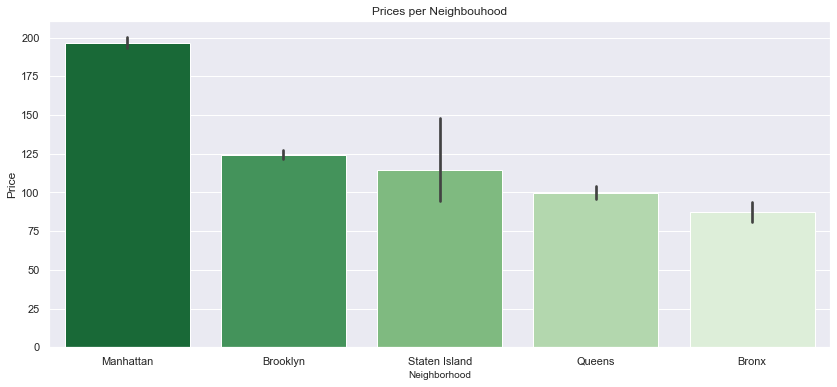

In [9]:
# Prices average by neighbourhood
plt.figure(figsize=(14,6))
sns.barplot(data=df, x='neighbourhood_group', y='price',
            order=['Manhattan','Brooklyn','Staten Island', 'Queens', 'Bronx'],
            palette = 'Greens_r')
plt.xlabel("Neighborhood",fontdict= {'size':10})
plt.ylabel("Price", fontdict= {'size':12})
plt.title("Prices per Neighbouhood")
plt.show()

Português:
Manhattan e Brooklyn são os grupos mais caros, seguindo a regra de oferta *vs.* demanda.

English:
We can see that Manhattan and Brooklyn are the most expensive groups, following the offer *vs.* demand rule.

#### 1.3 Onde estão as propriedades? - Where are the properties?

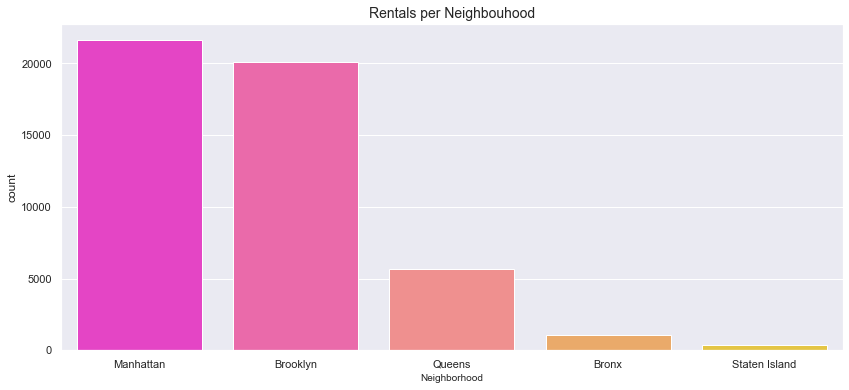

In [10]:
# Where are the most looked neighbourhoods
plt.figure(figsize=(14,6))
g = sns.countplot(x = 'neighbourhood_group', data = df, palette = 'spring',
                  order=df['neighbourhood_group'].value_counts().index)
plt.xlabel("Neighborhood",fontdict= {'size':10})
plt.title("Rentals per Neighbouhood", size=14)
plt.show()

Português:
Pelo gráfico, verificamos que Manhattan e Brooklyn são os locais preferidos, o que faz sentido se considerarmos que esses são os lugares mais procurados na cidade para negócios e/ou turismo.

English:
Chart shows that Manhattan and Brooklyn are the preferred locations, what makes sense if we consider that those are the most wanted places to go in the city for business and/or tourism.

#### 1.4 Localização *vs.* Preço - Location *vs.* Price

In [11]:
# Create a subset of the dataset with the top 50 renters
index = df.groupby('host_id').id.count().sort_values(ascending=False).head(50).index
df_top50 = df[df.host_id.isin(index)].reset_index()

In [12]:
# Create a function to add a marker to the map
def add_marker(lat, lon, text):
    return folium.CircleMarker(location=[lat, lon],
                               radius=3,
                               color='black',
                               popup=text).add_to(m)

# Creating the base map, initializing it over Manhattan and adding the points
m = folium.Map(location=[40.75, -73.97], zoom_start=13)
for i in range(len(df_top50)):
    add_marker(df_top50.latitude[i], df_top50.longitude[i],str(df_top50.price[i])+'USD')

# Adding the Heat Map 
data_loc= df_top50[['latitude','longitude', 'price']].values
data_loc =data_loc.tolist()
hm = plugins.HeatMap(data_loc)
hm.add_to(m)

m

Com o mapa de calor por localização e preço é mais fácil visualizar os locais onde os imóveis estão concentrados, e também que os preços mais altos estão no Brooklyn e em Manhattan, onde estão localizados a maioria das atrações turísticas/negócios.

Now with this heat map by location and price ploted, it becomes easier to see the locations where the properties are concentrated and also that the higher prices are in Brooklyn and Manhattan, where most business and touristic attractions are located.

#### 1.5 Tipo de imóveis para aluguel - Type of the properties for rent

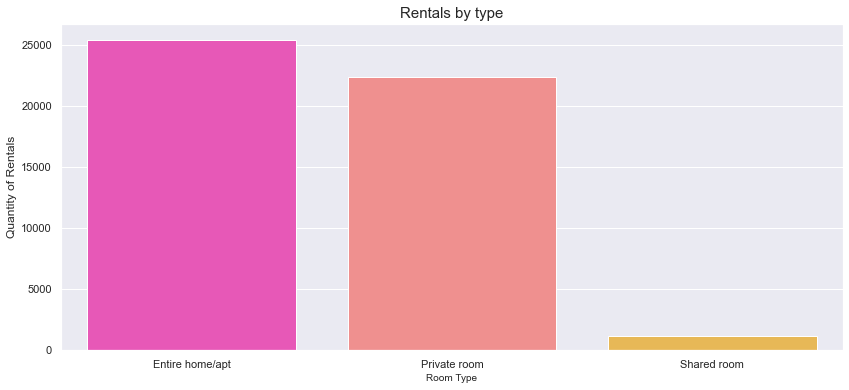

In [13]:
# Type of listings
plt.figure(figsize=(14,6))
g = sns.countplot(x = 'room_type', data = df, palette='spring',
                 order=['Entire home/apt','Private room','Shared room'])
plt.xlabel("Room Type",fontdict= {'size':10})
plt.ylabel("Quantity of Rentals", fontdict= {'size':12})
plt.title("Rentals by type", size=15)
plt.show()

Verificamos pelo grafico que normalmente as pessoas alugam uma casa/apartamento inteiro (*52%*), mas como NYC é uma cidade grande e cara, podemos ver quase o mesmo número de pessoas procurando um Quarto Privado (*46%* ), que provavelmente são usandos para capitalizar espaços vazios.

The results show us that usually people rent an entire home/appartment (*52%*), but given NYC is an expensive place and also big city, we can also see almost as many people looking for a Private Room (*46%*), probably using it to capitalize empty spaces.

---

### 2. Quais são os anfitriões mais ocupados e por quê? - Which ones are the busiest hosts and why?

A próxima analise visa compreender quais anfitriões são mais bem-sucedidos no Airbnb e tentar entender a razão para isso.

The next exploration is to understand which hosts are more successfull on Airbnb and try to understand why that happens.

#### 2.1 Quem são os anfitriões mais populares? - Who are the most popular hosts?

In [14]:
# Most busy hosts
busyHosts = pd.DataFrame(df.groupby('host_id').id.count().sort_values(ascending=False).head(10).reset_index())
busyHosts.columns = ['host_id','rentals']

In [15]:
# Appending the names of the busy hosts to the subset dataframe busyHosts
names = []
for r in range(busyHosts.shape[0]):
    for i in range(len(df)):
        if busyHosts.host_id[r] == df.host_id[i]:
            names.append(df.host_name[i])
            break

In [16]:
busyHosts['host_name'] = names
busyHosts

host_id  rentals          host_name
0  219517861      327       Sonder (NYC)
1  107434423      232         Blueground
2   30283594      121               Kara
3  137358866      103             Kazuya
4   16098958       96     Jeremy & Laura
5   12243051       96             Sonder
6   61391963       91  Corporate Housing
7   22541573       87                Ken
8  200380610       65            Pranjal
9    1475015       52               Mike

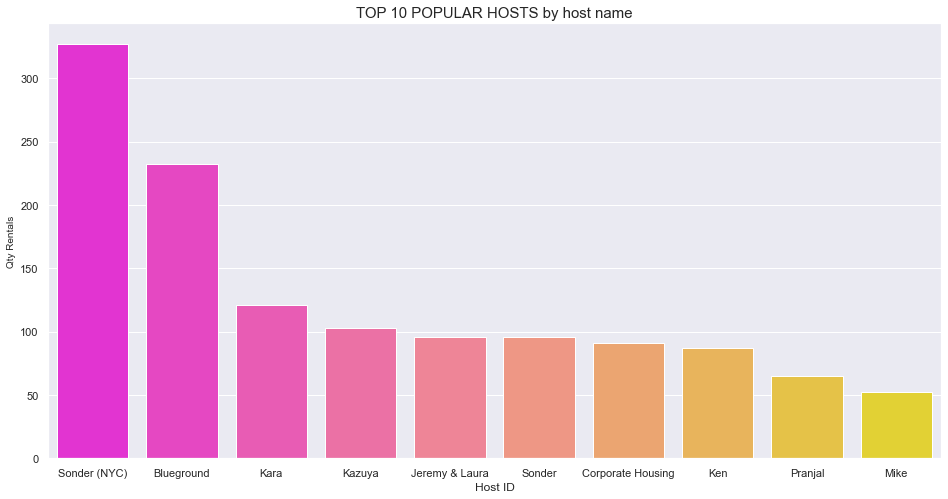

In [17]:
# Bar plot of the Top 10 busyHosts
plt.figure(figsize=(16,8))
g = sns.barplot(y='rentals', x= 'host_name', data=busyHosts, palette='spring')
plt.ylabel("Qty Rentals",fontdict= {'size':10})
plt.xlabel("Host ID", fontdict= {'size':12})
plt.title("TOP 10 POPULAR HOSTS by host name", size=15)
plt.show()

In [18]:
print(f'Unique host IDs: {len(df.host_id.unique())}')
print(f'Top 10 rentals: {sum(busyHosts.rentals)}. Percentual over Total Dataset: {round(sum(busyHosts.rentals)/len(df.id)*100,2)}%')

Unique host IDs: 37457
Top 10 rentals: 1270. Percentual over Total Dataset: 2.6%


A partir do grafico e calculos acima, é possível verificar que há uma concentração. Os 5 principais locatários são responsáveis por *69%* das 10 principais transações. Os 10 primeiros representam *2,6%* de todos os aluguéis, uma vez que são cerca de 37.500 IDs de host registrados.

From the chart and calculations above, it is possible to extract the information that there is a concentration here. The top 5 renters are responsible for *69%* of the top 10 transactions. The top 10 represent *2,6%* of all rentals, knowing that there are nearly 37,500 host ids registered.

#### 2.2 Onde eles têm suas propriedades - Where do they have their properties

In [19]:
# Extracting only the Top 10 hosts from original DF and put in a DF.
hosts = list(busyHosts.host_id)
df2 = df[df['host_id'].isin(hosts)]
df2 = pd.DataFrame(df2)

D:\ArquivosEProgramas\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


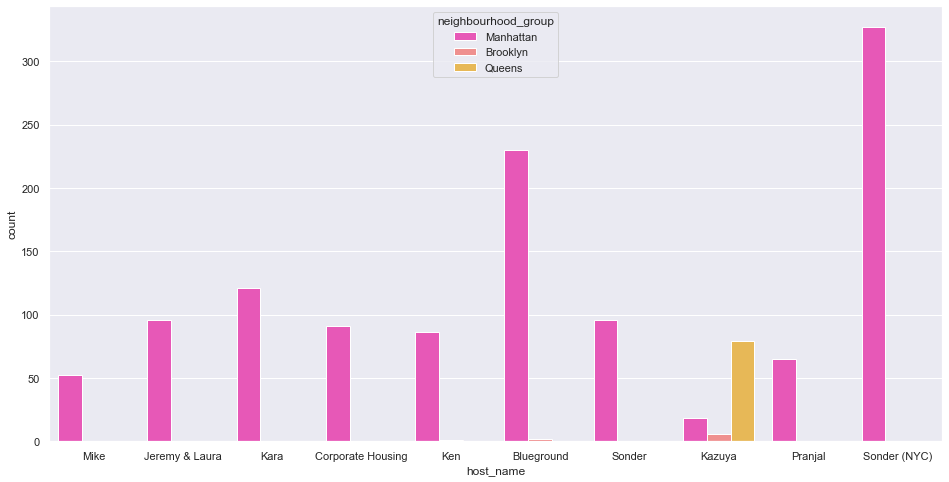

In [20]:
# Count plot of the listings by neighbourhood
plt.figure(figsize=(16,8))
sns.countplot('host_name', data=df2, hue='neighbourhood_group', palette='spring')
plt.show()

Os 10 principais hosts têm suas propriedades majoritariamente em Manhattan.

The top 10 renters have their estates mostly in Manhattan. 

#### 2.3 Quanto eles cobram? - How much do they charge?

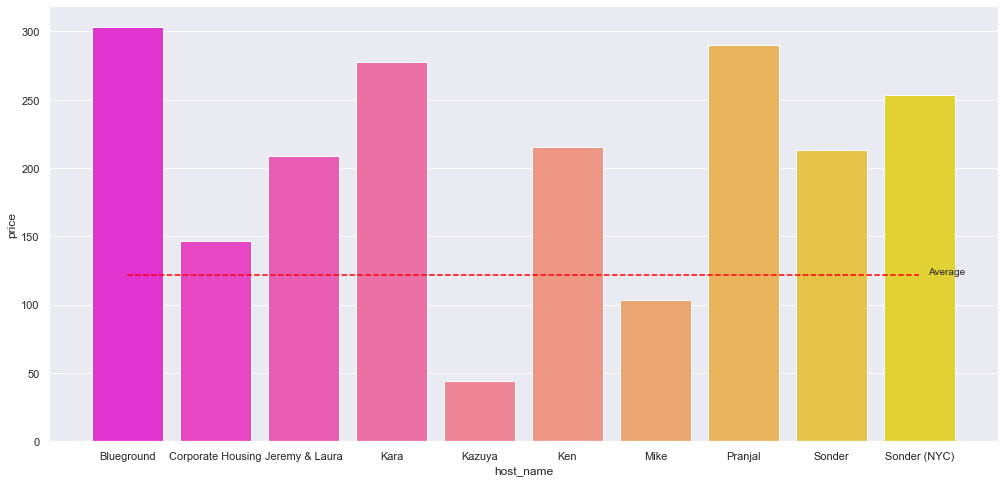

In [21]:
# First let's get the mean dollar amount the top 10 receive per night
top10_mean = df2.groupby('host_name').price.mean().reset_index()

# Barplot showing how much people pay for the rentals of the top 10 hosts
plt.figure(figsize=(17,8))
sns.barplot(x='host_name', y='price', data=top10_mean, palette='spring')

#include average w/o outliers (122 USD)
plt.plot([122, 122, 122, 122, 122, 122, 122, 122, 122, 122], color='red', linestyle='dashed')
plt.text(9.1,122,'Average')
plt.show()

Para os top 10, todos (exceto Kazuya - que está diferentemente geografico localizado - e Mike) cobram acima dos preços médios. Novamente, isso é consequência das muitas opções que eles têm nas regiões mais caras de NYC. A localização costuma ser um fator chave quando se trata de imóveis.

For the top 10 people, all of them (but Kazuya) charge over the average prices. Again, this is a consequence of many options they have in the most expensive ground in the NYC. Location is usually a key factor when it regards real estate. 

#### 2.4 Que tipo de propriedade o Top 10 lista para alugar no Airbnb? - What kind of property Top 10 usually list for renting in Airbnb?

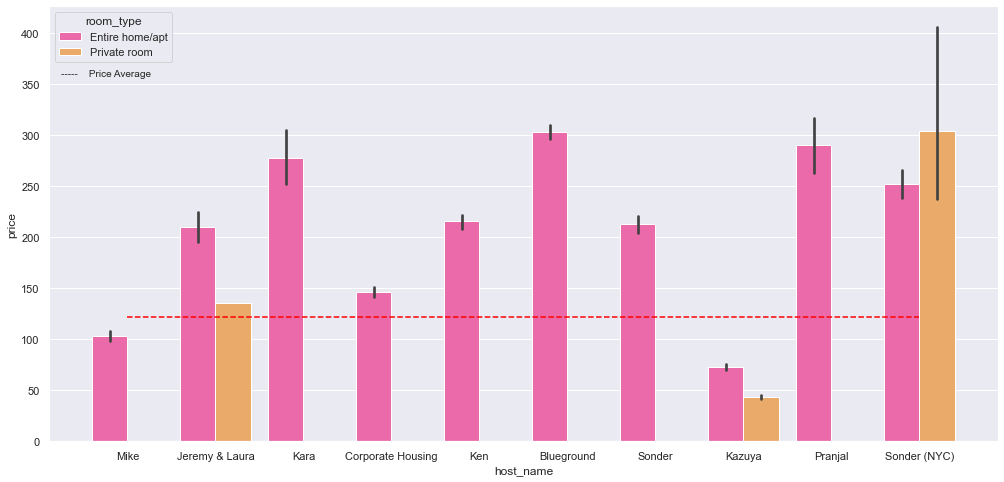

In [22]:
plt.figure(figsize=(17,8))
sns.barplot(x='host_name', y='price', data=df2, hue='room_type', palette='spring')
plt.plot([122, 122, 122, 122, 122, 122, 122, 122, 122, 122], color='red', linestyle='dashed')
plt.text(-0.75,358,'-----    Price Average')
plt.show()

Os top 10 hosts costumam disponibilizar o apartamento inteiro para alugar. E isso também é coerente com o fato de que eles cobram acima da média.

The top 10 renters usually have the entire appartment for rent. And this is coherent to the fact they charge over the average as well.

#### 2.5 Por quanto tempo os Top 10 alugam no Airbnb? - How long do the Top 10 rent in Airbnb?

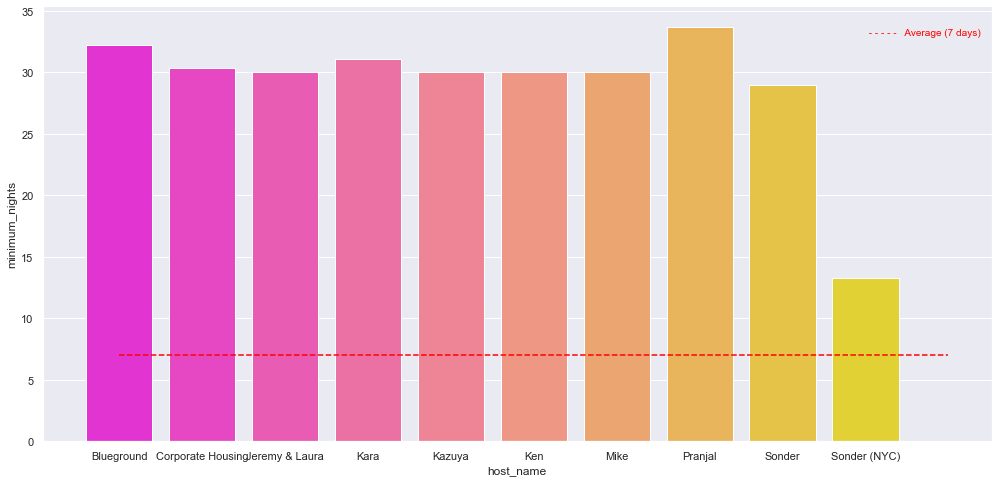

In [23]:
# First let's get the mean night amount the top 10 rent
top10_nightsmean = df2.groupby('host_name').minimum_nights.mean().reset_index()

# Barplot showing how much people pay for the rentals of the top 10 hosts
plt.figure(figsize=(17,8))
sns.barplot(x='host_name', y='minimum_nights', data=top10_nightsmean, palette='spring')

#include average w/o outliers (7 days)
plt.plot([7,7,7,7,7,7,7,7,7,7,7], color='red', linestyle='dashed')
plt.text(9,33,' - - - - -   Average (7 days)', color='red')

plt.show()

Interessante notar que os top 10 hosts têm seus imóveis alugados por um mês inteiro, em média. Eles provavelmente estão se concentrando em pessoas viajando a negócios, em vez de turistas.

Interesting to notice that the top 10 hosts have their properties rented for an entire month, on average. They are probably focusing on business people over tourists.

---

### 3. As melhores qualidades para alugar - Best Qualities for renting

Imports for Natural Languare Processing

In [24]:
# Natural Language Processing
import string
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *

# WordCloud
from wordcloud import WordCloud, ImageColorGenerator
from os import path
from PIL import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cabel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# Making a subset
df3 = df.filter(['name','host_id', 'host_name'], axis=1)
df3.head()

name  host_id    host_name
0                Clean & quiet apt home by the park     2787         John
1                             Skylit Midtown Castle     2845     Jennifer
2               THE VILLAGE OF HARLEM....NEW YORK !     4632    Elisabeth
3                   Cozy Entire Floor of Brownstone     4869  LisaRoxanne
4  Entire Apt: Spacious Studio/Loft by central park     7192        Laura

In [26]:
reviews = df3.name.astype(str)
reviews = " ".join(reviews).strip().lower()

#### 3.1 WordCloud

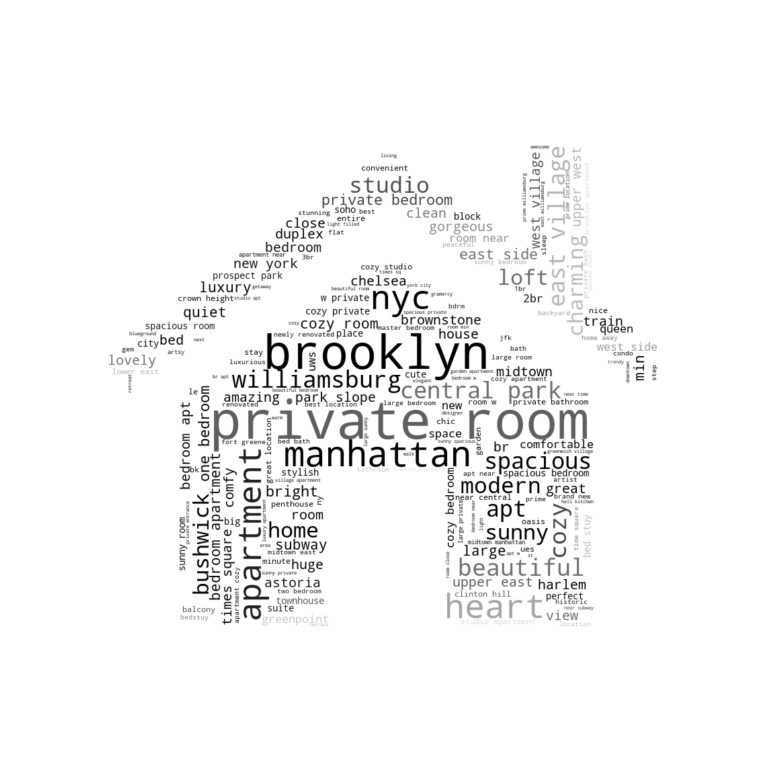

In [27]:
# Generate the text
text = reviews

# Create a mask from a png file to put the wordcloud into a house shape
mask = np.array(Image.open("casa.jpg"))

# Create stopword list:
stopwords = nltk.corpus.stopwords.words('english')

# Create the wordcloud with the colors from the jpg file (mask)
image_colors = ImageColorGenerator(mask)
wordcloud = WordCloud(mode="RGBA", mask=mask, stopwords=stopwords, background_color="white").generate(text)

#Display the wordcloud
plt.figure(figsize=[14,14])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")

fig.savefig('images/figwords.png',dpi=600, 
               bbox_inches='tight', 
               transparent=False,
               pad_inches=0) #Salvando o plot

plt.show()

Gosto de incluir uma nuvem de palavras na análise do Processamento de Linguagem Natural, pois é uma maneira simples e muito visual de ver as palavras que aparecem com mais frequência, portanto, são mais importantes. Na análise acima:
- Podemos ver que as pessoas estão hospedadas principalmente em apartamentos
- O coração de Manhattan e Brooklyn são os lugares mais citados.
- As pessoas gostam de lugares modernos e privativos, próximos a negócios ou pontos estratégicos.
- O lado Upper East da ilha é mais atrativo, pois lá você encontra o Central Park, a 5ª avenida, por exemplo.


I like to include a word cloud in the NLP analysis as it is a simple and very visual way to see the words that appear with more frequence, therefore are more important. In the analysis above: 
- We can see that people are staying mostly in apartments
- The heart of Manhattan and Brooklyn are the most mentioned places.
- People like modern and private places, close to business or strategic points.
- The Upper East side of the island is more attractive, as there you will find the Central Park, 5th avenue, for example.

#### 3.2 Tokenização e frequência de palavras - Tokenization and Word Frequence

In [28]:
# Tokenize reviews
import nltk
#nltk.download('popular')

tokens = word_tokenize(reviews)

In [29]:
# Exclude punctuation
exclude = set(string.punctuation)
tokens_no_punctuation = [word for word in tokens if word not in exclude]

In [30]:
# Remove stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
tokens_clean = [word for word in tokens_no_punctuation if word not in stopwords]

In [31]:
# Count words and put them in a dataframe
from collections import Counter
counts = Counter(tokens_clean)
counts_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
counts_df.columns = ['Word','Frequence']

In [32]:
# Sort
counts_df.sort_values(by='Frequence', ascending=False, inplace=True)
# Remove some numbers from the tokens
counts_df.drop(index=[21,54], axis=0, inplace=True)

In [33]:
# Filter on top 20
top20_tokens = counts_df.head(20)
top20_tokens.head(5)

Word  Frequence
27        room      10075
49     bedroom       7591
120    private       7171
23   apartment       6668
13        cozy       5035

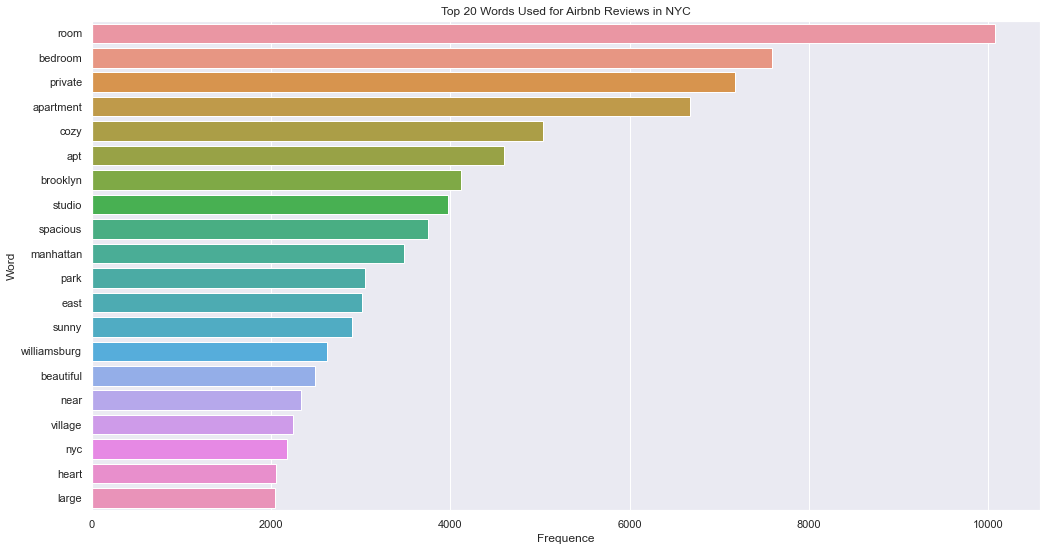

In [34]:
# Plot the Result
plt.figure(figsize=(17,9))
g = sns.barplot(y='Word', x= 'Frequence', data=top20_tokens)
plt.title("Top 20 Words Used for Airbnb Reviews in NYC")
plt.show()

#### 3.3 N-grams

N-gramas são 'n' palavras que são usadas em sequência, juntas em um texto. Assim, por exemplo, um Bigrama são duas palavras usadas juntas em um texto *(por exemplo, apartamento aconchegante)*. Trigramas são três palavras usadas em sequência *(por exemplo, lado leste superior)*. Analisar essas palavras pode nos trazer mais compreensão das resenhas, pois podemos colocar as palavras em um contexto.

N-grams are 'n' words that are used in sequence, together in a text. So, for example, a Bigram are two words used together in a text *(e.g. cozy apartment)*. Trigrams are three words used in sequence *(e.g. upper east side)*. Analysing those words can bring us more understanding of the reviews, as we can put the words in a context.

In [35]:
# Getting the Bigrams
buscaBigramas = nltk.collocations.BigramCollocationFinder.from_words(tokens_clean)

In [36]:
# Counting the frequence
bigrama_freq = buscaBigramas.ngram_fd.items()

In [37]:
# Putting in a dataframe
FreqBigramas = pd.DataFrame(list(bigrama_freq), 
                               columns = ['Bigram', 'Freq']).sort_values(by = 'Freq', ascending = False)

In [38]:
# Visualize the result
FreqBigramas.head(10)

Bigram  Freq
359        (private, room)  2816
146           (1, bedroom)  1567
21         (central, park)  1267
140        (east, village)  1245
269           (2, bedroom)  1033
1060    (private, bedroom)   929
45            (east, side)   928
329         (one, bedroom)   858
479           (cozy, room)   852
244   (bedroom, apartment)   798

Os bigramas nos trazem os seguintes insights:
- Quarto privado é constantemente procurado.
- Aluguel de apartamentos com 1 ou 2 quartos.
- Central Park é uma referência, como vimos nas palavras frequentes.
- O lado leste é mais requisitado. O que faz sentido, já que na 5ª avenida estão muitos negócios e atrações turísticas.


The bigrams bring us the following insights:
- Private room is constantly rented.
- People rent for 1 or 2 bedroom apartments.
- Central Park is a reference, as we saw in the words frequence.
- East side is more demanded. And it makes sense since 5th avenue holds a lot of businesses and touristic attractions.

In [39]:
# Search and count Trigram frequence
buscaTrigramas = nltk.collocations.TrigramCollocationFinder.from_words(tokens_clean)
trigrama_freq = buscaTrigramas.ngram_fd.items()

In [40]:
# Putting in a dataframe
FreqTrigramas = pd.DataFrame(list(trigrama_freq), 
                                columns = ['Trigram','Freq']).sort_values(by = 'Freq', ascending = False)

In [41]:
# Visualize the result
FreqTrigramas.head(10)

Trigram  Freq
737         (upper, east, side)   554
51          (upper, west, side)   422
44          (lower, east, side)   333
874       (near, central, park)   304
254     (1, bedroom, apartment)   245
1367      (cozy, private, room)   243
1312          (1, bedroom, apt)   224
2298         (home, away, home)   223
1567    (2, bedroom, apartment)   209
3167  (one, bedroom, apartment)   176

Os trigramas confirmam muitos dos insights dos Bigramas:
- Mais uma confirmação de que o lado leste superior está muito bem avaliado.
- Pessoas alugam apartamentos de 1 ou 2 quartos, ou quartos privados.
- Confirmação de que o Central Park é uma grande referência em Manhattan.
- Aqui podemos ver mais menções a qualidades subjetivas, como conceitos de *aconchegante* ou *casa longe da casa*.


The trigrams confirm a lot of those insights from the Bigrams. Let's see:
- Another confirmation that the Upper East Side is really well evaluated.
- People rent 1 or 2 bedroom apartments or private rooms
- Confirmation that the Central Park is a huge reference in Manhattan
- Here we can see more mentions to subjective qualities, such as *cozy* or *home away from home* concepts.

### 4. Análise das Top 10 Avaliações - Analysis of the Reviews Top 10

In [42]:
# Making a subset
df4 = df.filter(['name','host_id', 'host_name'], axis=1)
df4 = df4[df4.host_name.isin(names)]
df4.head()

name  host_id host_name
509     Historic classic central cozy Village clean NYU   872805      Mike
530   Spacious, Kid-Friendly, and 15-20 Mins. to Mid...   938056      Mike
639                   Great Studio in W. Village - NYC!  1269455      Mike
1120                Studio Apt in Park Slope- Brooklyn!  2355439      Kara
1386                2 BED TriBeCa, Beautiful-Renovated!  1475015      Mike

In [43]:
reviews_t10 = df4.name.astype(str)
reviews_t10 = " ".join(reviews_t10).strip().lower()

In [44]:
# Tokenize reviews
tokens_t10 = word_tokenize(reviews_t10)

In [45]:
# Exclude punctuation
exclude = set(string.punctuation)
tokens10_no_punctuation = [word for word in tokens_t10 if word not in exclude]

In [46]:
# Remove stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
tokens10_clean = [word for word in tokens10_no_punctuation if word not in stopwords]

In [47]:
# Getting the Bigrams
buscaBigramas10 = nltk.collocations.BigramCollocationFinder.from_words(tokens10_clean)

In [48]:
# Counting the frequence
bigrama_freq10 = buscaBigramas10.ngram_fd.items()

In [49]:
# Putting in a dataframe
FreqBigramas10 = pd.DataFrame(list(bigrama_freq10), 
                               columns = ['Bigram', 'Freq']).sort_values(by = 'Freq', ascending = False)

In [50]:
# Visualize the result
FreqBigramas10.head(10)

Bigram  Freq
3409        (sonder, stock)   158
3410      (stock, exchange)   158
1717              (1br, w/)    98
103            (1, bedroom)    65
1718              (w/, gym)    63
1897      (rooftop, sonder)    62
1048         (gym, doorman)    62
3283      (kitchen, sonder)    62
1841  (doorman, blueground)    61
1896         (1br, rooftop)    61

Para os top 10 hosts, vemos que um bigrama comum nas resenhas está relacionado à bolsa de valores, provavelmente alugada por pessoas que fazem negócios em Manhattan.

For the top 10 hosts, we see that a common Bigram in the reviews is related to stock exchange, probably rented by people doing business in Manhattan.

In [51]:
# Search and count Trigram frequence
buscaTrigramas10 = nltk.collocations.TrigramCollocationFinder.from_words(tokens10_clean)
trigrama_freq10 = buscaTrigramas10.ngram_fd.items()

In [52]:
# Putting in a dataframe
FreqTrigramas10 = pd.DataFrame(list(trigrama_freq10), 
                                columns = ['Trigram','Freq']).sort_values(by = 'Freq', ascending = False)

In [53]:
# Visualize the result
FreqTrigramas10.head(10)

Trigram  Freq
4990   (sonder, stock, exchange)   158
2623         (sonder, 116, john)    55
5007    (kitchen, sonder, stock)    50
4995         (sofa, bed, sonder)    46
4994            (1br, sofa, bed)    37
2590      (1br, rooftop, sonder)    36
2349          (w/, gym, doorman)    35
4996        (bed, sonder, stock)    35
2852  (gym, doorman, blueground)    35
5000      (1br, kitchen, sonder)    33

Os trigamas para os tops 10 trazem menções a alguns pontos como academia, cobertura, cozinha e porteiro que parecem ser apreciadas pelos clientes. Em uma rápida pesquisa, verifiquei que *Sonder* é uma empresa de Nova York que possui muitos apartamentos e é por isso que eles aparecem com tanta frequência em bigramas e trigramas.

The trigams for the top 10 bring mentions to some amendments like gym, rooftop, kitchen and doorman that appears to be appreciated by the clients. In a quick search, I found that *Sonder* is a company from NYC that owns many apartments and that is why they appear so frequently in bigrams and trigrams.

---

## Relatório de Conclusão

Após uma exploração completa do dataset do Airbnb em Nova York, podemos extrair algumas boas informações.
NYC é uma das cidades mais importantes do mundo. O PIB da cidade gira em torno de 1,5 trilhão de dólares, o que é maior do que muitos países. Assim, a quantidade de negócios e turismo que acontecem na cidade atrai uma grande quantidade de pessoas todos os dias.

Em Nova York, a ilha de Manhattan é o centro da economia, pois abriga muitos arranha-céus com diversos escritórios fazendo negócios todos os dias, além de muitas atrações turísticas conhecidas como o Empire State Building, Times Square, Central Park que traz outro grande número de pessoas a visitam a cidade todos os anos. Assim, naturalmente o bairro detém 44% dos lugares listados para locação. O Brooklyn vem em segundo lugar com 41%, mas isso se deve principalmente à sua proximidade com a ilha.

O valor gasto para ficar na cidade é algo entre 120 USD e 150 USD por noite para um apartamento ou quarto privado e as pessoas normalmente ficam menos de uma semana (2 a 5 dias são os aluguéis mais comuns). Normalmente os clientes procuram um apartamento de 1 ou 2 quartos ou um quarto privativo - *semelhante a um hotel* - e estão interessados em locais no lado superior leste (comumente mencionado como o 'coração de Manhattan'), com fácil acesso a o Central Park e todas as outras vantagens dessa área. As avaliações também mencionam conceitos como quartos 'privados' e 'aconchegantes', demonstrando que os clientes estão preocupados com a limpeza e manutenção do local.

Olhando para o outro lado da transação (os anfitriões que alugam seus imóveis), podemos ver que eles têm sua localização concentrada em Manhattan e Brooklyn. Os 10 melhores anfitriões conseguem cobrar mais do que a média por seus apartamentos ou quartos - *concluo que isso se deve principalmente à localização* - e mantêm o espaço localizado por 30 dias em média. Então, isso nos leva ao fato de que os 10 principais anfitriões provavelmente não estão focando em aluguel para turistas, mas estão trabalhando com empresas, então mantêm o local alugado por períodos mais longos e por um preço mais alto. Para esse público, as resenhas frequentemente mencionam pontos como *academia, porteiro, cobertura e bolsa de valores*, reforçando a teoria de que o top 10 privilegia os negócios em detrimento do turismo.

## Conclusion Report

After a complete exploration of the Airbnb dataset for NYC rentals, we can extract some good information.
NYC is one of the most important cities in the world. The city's GDP is around 1.5 trillion dollars (*Business Insider*), what is bigger than many countries. Thus, the quantity of businesses and tourism happening in the city attracts huge amounts of people every day.

In New York, the Manhattan island is the center of the economy, as it hosts many skyscrapers with countless offices doing business every day, as well as many well known touristic attractions like the Empire State Building, Times Square, Central Park that brings another countless number of people to visit the city every year. Thus, naturally the neighbourhood holds 44% of the places listed for rental. Brooklyn comes in second place with 41%, but that is mainly given its proximity to the island.

The amount being spent to stay in the city is somewhere between 120 USD and 150 USD per night for an apartment or a private room and people like to stay less than a week (2 to 5 days are the most common rentals). Usually the clients are looking for a 1 or 2 bedroom apartment or private room - *similar to a hotel* - and they are interested in locations on the Upper East Side (commonly mentioned as the 'heart of Manhattan'), with easy access to the Central Park and all the other advantages of that area. The reviews also mention concepts like 'private' and 'cozy' rooms, demonstrating the clients are worried about cleanliness and maintenance of the place.

Looking to the other side of the transaction (the hosts who rent their properties), we can see they have their location concentrated on Manhattan and Brooklyn. Top 10 hosts are able to charge more than average for their apartments or rooms - *I conclude that this is mainly due to the location* - and they keep the space located for 30 days on average. So this leads us to the fact that the top 10 hosts are probably not focusing on renting to tourists, but they are working with businesses, so they keep the location rented for longer periods and for a higher price. For that public, the reviews frequently mention amendments like *gym, doorman, rooftop and stock exchange*, reinforcing the theory that the top 10 focus on business over tourism.